<a href="https://colab.research.google.com/github/vicmarcondes/casadocodigo/blob/master/carrinho_compras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [262]:
import numpy as np
import pandas as pd
import random as rd
from random import randint
import matplotlib.pyplot as plt


**Read csv**

In [263]:
url = "https://raw.githubusercontent.com/luisdurante/IA-II-algoritmo-genetico-carrinho-de-compras/master/amostra.csv"
df = pd.read_csv("https://raw.githubusercontent.com/luisdurante/IA-II-algoritmo-genetico-carrinho-de-compras/master/amostra.csv", sep=';')

,produto,valor,prioridade,categoria,valor nutritivo
0,água,"R$ 1,99",5,bebidas,5
1,cerveja,"R$ 3,99",2,bebidas,1
2,refrigerante 2L,"R$ 6,00",2,bebidas,1
3,vodka,"R$ 30,00",1,bebidas,1
4,vinho,"R$ 60,00",2,bebidas,1


**Add new column**

In [264]:
df['valor_nutricional'] = np.random.randint(1,10, size = df.shape[0])

**Transform the 'value' column in float**

In [265]:
df.valor = df.valor.apply(lambda x: float(x.replace(',','.')[2:]))
df.valor.sum()

528.48

**Initial population**

In [266]:
solutions_per_pop = 98
threshold = 100
num_generations = 50
item_number = np.arange(1,50)
pop_size = (solutions_per_pop, df.shape[0])
print('Population size: {}'.format(pop_size))
initial_population = np.random.randint(2, size = pop_size)
initial_population = initial_population.astype(int)
print('Initial population: \n{}'.format(initial_population))

Population size: (98, 39)
Initial population: 
[[0 1 0 ... 1 1 0]
 [1 1 0 ... 1 1 0]
 [1 1 0 ... 0 1 1]
 ...
 [0 1 1 ... 1 0 0]
 [1 0 0 ... 1 0 1]
 [0 1 0 ... 1 0 0]]


In [267]:
def cal_fitness(weight, value, priority, population, threshold):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        total_nutritious = np.sum(population[i] * value)
        total_value = np.sum(population[i] * weight)
        total_priority = np.sum(population[i] * priority * 5)
        
        if total_value <= threshold:
            fitness[i] = total_nutritious + total_priority
        else :
            fitness[i] = abs((total_nutritious + total_priority) - (total_value - threshold))
    return fitness.astype(int)

In [268]:
def selection(fitness, num_parents, population):
    fitness = list(fitness)
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        parents[i,:] = population[max_fitness_idx[0][0], :]
        fitness[max_fitness_idx[0][0]] = 999999
    return parents

In [269]:
def crossover(parents, num_offsprings):
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2)
    crossover_rate = 0.8
    i=0
    while (parents.shape[0] < num_offsprings):
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        x = rd.random()
        if x > crossover_rate:
            continue
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
        i=+1
    return offsprings    

In [270]:
def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.05
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            continue
        int_random_value = randint(0,offsprings.shape[1]-1)    
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    return mutants   

In [271]:
def optimize(weight, value, priority, population, pop_size, num_generations, threshold):
    parameters, fitness_history = [], []
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents 
    for i in range(num_generations):
        fitness = cal_fitness(weight, value, priority, population, threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, population)
        offsprings = crossover(parents, num_offsprings)
        mutants = mutation(offsprings)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants
        
    print('Last generation: \n{}\n'.format(population[2])) 
    fitness_last_gen = cal_fitness(weight, value, priority, population, threshold)      
    print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

In [272]:

parameters, fitness_history = optimize(df.valor, df.valor_nutricional, df.prioridade, initial_population, pop_size, num_generations, threshold)
print('The optimized parameters for the given inputs are: \n{}'.format(parameters))
# selected_items = item_number * parameters
# print('\nSelected items that will maximize the knapsack without breaking it:')
# for i in range(selected_items.shape[1]):
#   if selected_items[0][i] != 0:
#      print(' {} - Valor nutricional: {} - Valor: R$ {}\n'.format(df.produto.iloc[selected_items[0][i] - 1], df.valor_nutricional.iloc[selected_items[0][i] - 1], 
#                                    df.valor.iloc[selected_items[0][i] - 1]))

Last generation: 
[1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1]

Fitness of the last generation: 
[548 548 548 548 548 548 548 548 548 548 548 548 548 548 548 548 548 548
 548 548 548 548 548 548 548 548 548 548 548 548 548 548 548 548 548 548
 548 548 548 548 548 548 548 548 548 548 548 548 548 517 548 548 548 548
 548 548 548 548 548 548 548 548 548 548 548 548 548 548 535 548 548 548
 548 548 548 548 548 548 548 548 532 548 548 548 548 548 544 546 548 548
 548 548 548 548 548 540 548 548]

The optimized parameters for the given inputs are: 
[array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])]


**Fitness through the generations**

mean: [249.09183673469389, 453.53061224489795, 453.1326530612245, 539.2448979591836, 539.3979591836735, 539.7244897959183, 541.3775510204082, 542.969387755102, 543.7244897959183, 545.1734693877551, 547.4795918367347, 547.1224489795918, 547.6224489795918, 547.530612244898, 547.4387755102041, 547.4795918367347, 547.4387755102041, 547.6836734693877, 546.6734693877551, 547.530612244898, 547.0816326530612, 547.3979591836735, 547.6428571428571, 547.3469387755102, 547.5102040816327, 547.0612244897959, 547.3367346938776, 547.1734693877551, 547.4387755102041, 547.6836734693877, 546.6428571428571, 547.3367346938776, 546.8775510204082, 547.3673469387755, 547.2448979591836, 547.5204081632653, 547.6122448979592, 547.265306122449, 547.2142857142857, 547.3163265306123, 547.0612244897959, 547.0102040816327, 547.4795918367347, 547.204081632653, 547.1938775510204, 547.1224489795918, 547.3877551020408, 547.3061224489796, 547.0408163265306, 547.204081632653] - max: [368, 540, 540, 540, 540, 544, 544, 544,

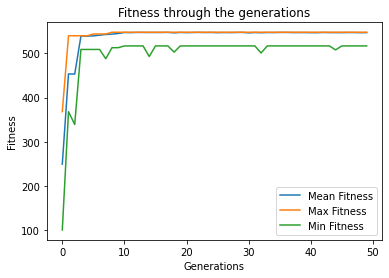

(50, 98)


In [273]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
fitness_history_min = [np.min(fitness) for fitness in fitness_history]
print('mean: {} - max: {} - min: {}'.format(fitness_history_mean, fitness_history_max, fitness_history_min))

plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.plot(list(range(num_generations)), fitness_history_min, label = 'Min Fitness')

plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)